In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from scipy.stats import mode
import numpy as np
from time import time
import pandas as pd
import os
import matplotlib.pyplot as matplot
import matplotlib
%matplotlib inline

import random
matplot.rcdefaults()
from IPython.display import display, HTML
from itertools import chain
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sb
from sklearn.model_selection import ParameterGrid
from sklearn.svm import SVC, LinearSVC
import warnings
warnings.filterwarnings('ignore')

# Data Processing

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd


Mounted at /content/drive


In [27]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/logistic_regression/train.csv', delimiter=',')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/logistic_regression/test.csv', delimiter=',')
train_results = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/logistic_regression/train_result.csv", delimiter=',')
y_train = train_results['Class']
train_data = train_data.iloc[: , :-1]
test_data = test_data.iloc[: , :-1]

In [24]:
# train_data[train_data < 0.3] = 0
# train_data[train_data > 0.3] = 255

In [29]:
train_data.shape
#y_train.shape

(50000, 1568)

In [7]:
np.min(test_data)

Feature 1       0.000000e+00
Feature 2       0.000000e+00
Feature 3       0.000000e+00
Feature 4       0.000000e+00
Feature 5       0.000000e+00
                    ...     
Feature 1564   -3.843456e-17
Feature 1565   -3.560401e-17
Feature 1566   -2.275294e-17
Feature 1567   -5.484856e-18
Feature 1568   -5.032500e-19
Length: 1568, dtype: float64

In [8]:
np.max(test_data, axis=1)

0       0.996094
1       0.996094
2       0.996094
3       0.996094
4       0.996094
          ...   
9995    0.996094
9996    0.996094
9997    0.996094
9998    0.996094
9999    0.996094
Length: 10000, dtype: float64

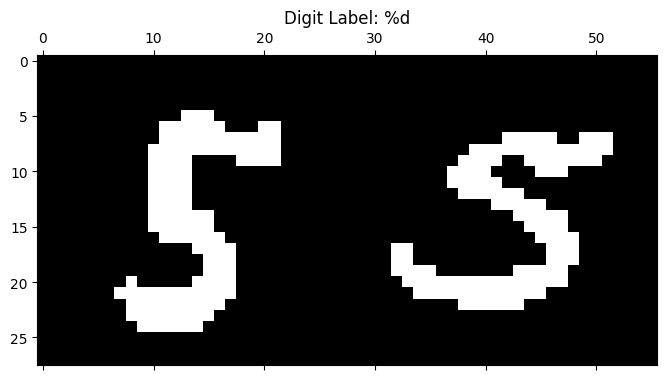

In [ ]:
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from matplotlib import pyplot
rcParams['figure.figsize'] = 12, 4
# get_ipython().magic(u'matplotlib inline')
%matplotlib inline

def pixel_mat():
    # we're working with train_df so we want to drop the label column
    vec = train_data.values[20]
    # numpy provides the reshape() function to reorganize arrays into specified shapes
    pixel_mat = vec.reshape(28,56)
    return pixel_mat

plt.matshow(pixel_mat(), cmap=plt.cm.gray)
plt.title("Digit Label: %d")
plt.show()

In [ ]:
zero_cols = list(set(train_data.columns[(train_data == 0).all()].tolist() + test_data.columns[(test_data == 0).all()].tolist()))
print(len(zero_cols))

272


In [16]:
train_data = train_data.drop(zero_cols, axis=1)
test_data = test_data.drop(zero_cols, axis=1)

NameError: ignored

# Training, Validation Test Split

In [30]:
train_data = train_data/255.0
test_data = test_data/255.0

print("X:", train_data.shape)
print("test_data:", test_data.shape)

X_train = preprocessing.scale(train_data)
X_test = preprocessing.scale(test_data)

X: (50000, 1568)
test_data: (10000, 1568)


In [18]:
print(np.min(train_data.values[0]))

0.0


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, train_size = 0.8, random_state = 10)

# SVN Modelling Matrix

In [ ]:
model_linear = SVC(gamma="scale",class_weight="balanced",C=10)
model_linear.fit(X_train, y_train)
y_pred = model_linear.predict(X_val)

print("accuracy:", metrics.accuracy_score(y_true=y_val, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_val, y_pred=y_pred))

accuracy: 0.6897 

[[ 98   0   3   0   0   4   0   0   1   0   0   0   0   0   0   0   0   0
    0]
 [  1 201   2   1   1   2   1   2   1   2   0   0   0   0   0   0   0   0
    0]
 [  2   2 296  11  13   2   8   8  13   2   2   0   1   0   0   0   0   0
    0]
 [  0   1   9 305   8  18   5   8  16  14   7   4   0   0   0   0   0   0
    0]
 [  1   2   9  20 377  13  22  13   7  17  14   6   3   0   0   1   0   0
    0]
 [  1   0   5  21  17 426  12  28  20  17  30  19   2   1   0   0   1   0
    0]
 [  2   1   4   5  24  15 511  25  30  21  20  21  12   1   4   1   1   0
    0]
 [  1   4   5   8  13  16  24 530  18  38  24  31  31   7   9   4   1   0
    0]
 [  0  10   7  14   8  17  31  25 642  34  44  11   9  31   7   5   0   1
    0]
 [  0   0   4  10  20   9  19  49  36 672  29  49  23  23  16  11   1   1
    0]
 [  0   0   4  20  19  33  14  31  35  38 636  36  40  20  11  12   8   3
    0]
 [  0   0   0   5   9  12  27  26  35  47  46 499  21  31  14   8  12   8
    0]
 [  0   0

In [ ]:
# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)


In [ ]:
model_rbf = SVC(gamma="scale",class_weight="balanced",C=10, kernel='rbf')
model_rbf.fit(X_train, y_train)

SVC(C=10, class_weight='balanced')

In [ ]:
y_pred = model_rbf.predict(X_val)
#from sklearn import metrics
#from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_val, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_val, y_pred=y_pred))

accuracy: 0.7034 

[[ 98   0   4   0   0   3   0   0   1   0   0   0   0   0   0   0   0   0
    0]
 [  1 203   1   0   2   1   1   1   2   2   0   0   0   0   0   0   0   0
    0]
 [  2   2 297  10  13   1   6  11  15   0   1   1   1   0   0   0   0   0
    0]
 [  0   1   7 315   8  15   6  11  12  10   9   1   0   0   0   0   0   0
    0]
 [  0   1   9  15 381  13  18  11  10  21  19   4   2   0   0   1   0   0
    0]
 [  1   0   2  18  19 442  11  26  17  19  27  14   1   2   0   0   1   0
    0]
 [  4   1   3   4  15  16 519  24  28  18  20  27  13   0   3   2   1   0
    0]
 [  1   5   3   5  19  20  21 539  17  44  19  27  24   8   5   6   1   0
    0]
 [  1   9   7  14   8  13  29  31 650  33  44   7  10  26   8   5   1   0
    0]
 [  0   0   3   9  23   5  21  53  29 664  36  53  25  20  17  12   1   1
    0]
 [  0   0   2  17  14  32  18  36  40  33 639  32  37  23  11  14   9   3
    0]
 [  0   0   0   3   8  13  29  22  28  48  49 506  19  38  11   6  14   6
    0]
 [  0   0

# Hyperparameter Tuning

In [ ]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [5,10]}]
# specify model
svc = SVC(gamma="scale",class_weight="balanced")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      
# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [5, 10], 'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
out = model_cv.predict(X_train)

In [ ]:
accuracy_score(y_train, out)

1.0

# Refining the hyperparameter tunings: Which kernal should we use?

In [31]:
X, X_val, y, y_val = train_test_split(X_train, y_train, test_size = 0.1, train_size = 0.1, random_state = 10)

In [26]:
X_train.shape

(5000,)

In [ ]:
acc = []
acc_tr = []
coefficient = []
for c in [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
    svm = LinearSVC(dual=False, C=c)
    svm.fit(X,y)
    coef = svm.coef_
    
    p_tr = svm.predict(X)
    a_tr = accuracy_score(X, p_tr)
    
    pred = svm.predict(X_val)
    a = accuracy_score(y_val, pred)
    
    coefficient.append(coef)
    acc_tr.append(a_tr)
    acc.append(a)

In [ ]:
c = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

matplot.subplots(figsize=(10, 5))
matplot.semilogx(c, acc,'-gD' ,color='red' , label="Testing Accuracy")
matplot.semilogx(c, acc_tr,'-gD' , label="Training Accuracy")
#matplot.xticks(L,L)
matplot.grid(True)
matplot.xlabel("Cost Parameter C")
matplot.ylabel("Accuracy")
matplot.legend()
matplot.title('Accuracy versus the Cost Parameter C (log-scale)')
matplot.show()